# Preprocessing and Data Cleaning

This is one of the most important step in the Machine Learning and Data Science Pipeline. Here are some facts:
- The data you receive is going to be real life data and is going to have a lot of noise
- There will be missing values and outliers which need to be dealt with
- More often than not you won't be able to just feed data into a model without any preprocessing, or the model is going to misbehave

Statistics and Probability form a huge part of Data Preprocessing.
- You get to understand the data using statistics and then you can take actions to clean and process the data accordingly.
- Probability gives us models of how different variables might behave in the real world. For example, variables like heights can be modeled as normal distributions (bell curves), word occurences can be modeled as a zipf ditrbution, etc
- Combining both of them with domain knowledge and Data Visualisation can help guide us about not only how to process the data but also what models to use

Frameworks like Pandas, Matplotlib, Seaborn, scikit-learn can help us with all these tasks

<b> Disclaimer: </b> This is not an exhaustive list of all the things that can be done as part of the Preprocessing and Cleaning Steps. Moreover, a lot of techniques used need a lot of trial and error and depend on the data domain, compute power that you might have etc. We want to provide a foundation over which you can explore and then learn more.

Remember Google is your best friend. Although you'll get almost everything correct on ChatGPT in the beginning, we recommend that you look at the documentation for the libraries you are using as they will help *a lot* later on.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocesing and Data Cleaning

### Loading the Data

As shown before, we can use Pandas to load and look at statistics of the data

In [2]:
train_df=pd.read_csv("train.csv")

In [3]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Dealing with Null Values

It is generally a good idea to drop duplicates from the dataset to avoid unnecessary biases in the ML Model. These might occur if the datapoints are repeated unnecessarily while data collection, etc.

In [4]:
train_df.shape

(1460, 81)

In [5]:
train_df.drop_duplicates(inplace=True)

In [6]:
train_df.shape

(1460, 81)

We can see here that there are no duplicates

Next, we will check for null values. It is very easy to figure out the number of null values in each column using Pandas.

In [7]:
train_df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

The number of null values in the column give us only some idea about how to deal with the null values, so we use null percentages instead.

In [8]:
null_value_percentages=(train_df.isna().sum()/train_df.shape[0])*100
null_value_percentages

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [9]:
columns_with_null_values = null_value_percentages[null_value_percentages>0]
columns_with_null_values

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

Looking at the percentages of null values, we can divide the column types largely into these categories:
- Columns with very less null values (0-5%)
- Columns with moderate amount of null values (5-30%)
- Columns with a lot of null values (>30%)

NOTE: These thresholds are arbitrary, and you should look at the column description and type before taking a decision on how to deal with null values in those columns

Largely, there are the following ways to deal with null values:
- Dropping rows
- Dropping cols
- Imputing values - Central Tendencies or Approximating the values

### Dropping Rows

When the number of null values are low in the column, we can just drop the rows which are creating the issue. 

In [10]:
rows_to_drop=null_value_percentages[null_value_percentages<5].sort_values(ascending=False)

In [11]:
rows_to_drop

BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtCond         2.534247
BsmtQual         2.534247
BsmtFinType1     2.534247
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 69, dtype: float64

In [13]:
rows_to_drop=rows_to_drop.keys()
rows_to_drop

Index(['BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'BsmtFinType1',
       'MasVnrArea', 'Electrical', 'Street', 'MSSubClass', 'Id', 'LotArea',
       'MSZoning', 'LotShape', 'BldgType', 'HouseStyle', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'LandContour',
       'RoofMatl', 'RoofStyle', 'YearRemodAdd', 'YearBuilt', 'OverallCond',
       'OverallQual', 'ExterQual', 'Exterior1st', 'ExterCond', 'Foundation',
       'Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Condition2', 'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
 

After we have the cols with less null values, we can drop the null rows

In [14]:
for row in rows_to_drop:
	print("row: ",row,"\tmissing values: \t",train_df[row].isna().sum())

row:  BsmtExposure 	missing values: 	 38
row:  BsmtFinType2 	missing values: 	 38
row:  BsmtCond 	missing values: 	 37
row:  BsmtQual 	missing values: 	 37
row:  BsmtFinType1 	missing values: 	 37
row:  MasVnrArea 	missing values: 	 8
row:  Electrical 	missing values: 	 1
row:  Street 	missing values: 	 0
row:  MSSubClass 	missing values: 	 0
row:  Id 	missing values: 	 0
row:  LotArea 	missing values: 	 0
row:  MSZoning 	missing values: 	 0
row:  LotShape 	missing values: 	 0
row:  BldgType 	missing values: 	 0
row:  HouseStyle 	missing values: 	 0
row:  Utilities 	missing values: 	 0
row:  LotConfig 	missing values: 	 0
row:  LandSlope 	missing values: 	 0
row:  Neighborhood 	missing values: 	 0
row:  Condition1 	missing values: 	 0
row:  LandContour 	missing values: 	 0
row:  RoofMatl 	missing values: 	 0
row:  RoofStyle 	missing values: 	 0
row:  YearRemodAdd 	missing values: 	 0
row:  YearBuilt 	missing values: 	 0
row:  OverallCond 	missing values: 	 0
row:  OverallQual 	missing 

In [15]:
train_df.shape

(1460, 81)

In [16]:
for row in rows_to_drop:
	if(null_value_percentages[row]<2):
		train_df.drop(labels=train_df.index[train_df[row].isna()],inplace=True)

In [17]:
train_df.shape

(1451, 81)

We can see that the rows have been dropped

Next we will look at the columns which have a lot of null values, *most* of the times, these columns might not be contributing much information to the model and imputing them *might* instead introduce biases, so we ignore them or drop them

In [18]:
columns_to_drop=null_value_percentages[null_value_percentages>40]

In [19]:
columns_to_drop=columns_to_drop.keys()
columns_to_drop

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [20]:
train_df.drop(columns=columns_to_drop,inplace=True)

In [21]:
train_df.shape

(1451, 75)

Note the use of <b>inplace</b>. A lot of functions in not only Pandas offer this or something similar (like copy, etc) which makes the changes inplace and does not create copies of objects. This is very important in Data Science as many times, you have big datasets which you don't want to copy unnecessarily.

It is a good practice to check if any new duplicates have spawned after dropping columns

In [22]:
train_df.drop_duplicates(inplace=True)

In [23]:
null_value_percentages=(train_df.isna().sum()/train_df.shape[0])*100
null_value_percentages=null_value_percentages[null_value_percentages>0]
columns_to_impute=null_value_percentages.keys()
columns_to_impute

Index(['LotFrontage', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [24]:
for column in columns_to_impute:
	if(train_df[column].dtype== object):
		print("Column: ",column,"\tCounts:\n", train_df[column].value_counts(dropna=False))
		print("\n\n")

Column:  BsmtQual 	Counts:
 BsmtQual
TA     648
Gd     611
Ex     120
NaN     37
Fa      35
Name: count, dtype: int64



Column:  BsmtCond 	Counts:
 BsmtCond
TA     1303
Gd       64
Fa       45
NaN      37
Po        2
Name: count, dtype: int64



Column:  BsmtExposure 	Counts:
 BsmtExposure
No     945
Av     221
Gd     133
Mn     114
NaN     38
Name: count, dtype: int64



Column:  BsmtFinType1 	Counts:
 BsmtFinType1
Unf    427
GLQ    413
ALQ    220
BLQ    148
Rec    132
LwQ     74
NaN     37
Name: count, dtype: int64



Column:  BsmtFinType2 	Counts:
 BsmtFinType2
Unf    1247
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64



Column:  GarageType 	Counts:
 GarageType
Attchd     863
Detchd     387
BuiltIn     86
NaN         81
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64



Column:  GarageFinish 	Counts:
 GarageFinish
Unf    605
RFn    418
Fin    347
NaN     81
Name: count, dtype: int64



Column:  GarageQual 	C

As we can see, there are a lot of categorical columns with null values which are not too many but still significant. Replacing this with the major class is not a good practice always, although that is the easiest one.

Various Things are taken into consideration while imputing. Domain Knowledge plays the most vital role. 

For now I have imputed these columns with a new class like NoGarage, NoBasement, etc.

Depending on the data it can be replaced with a statistical measure or a new class.

There can be various techniques to impute. As null values can stand for different things, like absence of something, non availability of information, etc, we need to deal with them accordingly:
- replacing all values with a new value - this is useful when you can see that the column you are looking at will likely have one particular value or when you know that null indicates the abscence of that quantity
- replacing all values with statistical measures - it can also be a good idea to replace certain columns like height with statistical measures like mean, median or mode
- replacing parameters based on unsupervised learning - we can also use clustering to get better imputations, for example you get better estimations for height if you know the gender or the country of origin, etc, but this method of imputation can become very computationally expensive very quickly

Note that if not used properly, imputation can and will create biases in your data

In [27]:
columns_to_impute

Index(['LotFrontage', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In these columns you can see that null value likely represents the absence of the Basements or Garages, so we will replace these null values with a new class which indicates accordingly

In [29]:
train_df["BsmtQual"].replace(to_replace=np.nan,value="NoBasement",inplace=True)
train_df["BsmtCond"].replace(to_replace=np.nan,value="NoBasement",inplace=True)
train_df["BsmtExposure"].replace(to_replace=np.nan,value="NoBasement",inplace=True)
train_df["BsmtFinType1"].replace(to_replace=np.nan,value="NoBasement",inplace=True)
train_df["BsmtFinType2"].replace(to_replace=np.nan,value="NoBasement",inplace=True)
train_df["GarageType"].replace(to_replace=np.nan,value="NoGarage",inplace=True)
train_df["GarageYrBlt"].replace(to_replace=np.nan,value="NoGarage",inplace=True)
train_df["GarageFinish"].replace(to_replace=np.nan,value="NoGarage",inplace=True)
train_df["GarageQual"].replace(to_replace=np.nan,value="NoGarage",inplace=True)
train_df["GarageCond"].replace(to_replace=np.nan,value="NoGarage",inplace=True)

/tmp/ipykernel_30330/3906809796.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["BsmtQual"].replace(to_replace=np.nan,value="NoBasement",inplace=True)
/tmp/ipykernel_30330/3906809796.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].m

In [30]:
for column in columns_to_impute:
	if(train_df[column].dtype== object):
		print("Column: ",column,"\tCounts:\n", train_df[column].value_counts(dropna=False))
		print("\n\n")

Column:  BsmtQual 	Counts:
 BsmtQual
TA            648
Gd            611
Ex            120
NoBasement     37
Fa             35
Name: count, dtype: int64



Column:  BsmtCond 	Counts:
 BsmtCond
TA            1303
Gd              64
Fa              45
NoBasement      37
Po               2
Name: count, dtype: int64



Column:  BsmtExposure 	Counts:
 BsmtExposure
No            945
Av            221
Gd            133
Mn            114
NoBasement     38
Name: count, dtype: int64



Column:  BsmtFinType1 	Counts:
 BsmtFinType1
Unf           427
GLQ           413
ALQ           220
BLQ           148
Rec           132
LwQ            74
NoBasement     37
Name: count, dtype: int64



Column:  BsmtFinType2 	Counts:
 BsmtFinType2
Unf           1247
Rec             54
LwQ             46
NoBasement      38
BLQ             33
ALQ             19
GLQ             14
Name: count, dtype: int64



Column:  GarageType 	Counts:
 GarageType
Attchd      863
Detchd      387
BuiltIn      86
NoGarage     81
Basment

## Outlier Detection and Removal

Let us look at another column with null values

In [34]:
null_value_percentages=(train_df.isna().sum()/train_df.shape[0])*100
null_value_percentages=null_value_percentages[null_value_percentages>0]
null_value_percentages

LotFrontage    17.711923
dtype: float64

In [35]:
train_df['LotFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1451, dtype: float64

As you can see the values in this column indicate the area, we can try to impute these values with mean or median. But first we will visualise this column with something called a boxplot.

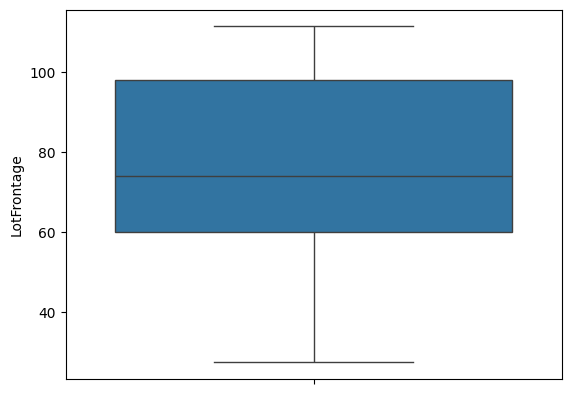

<Figure size 1000x1000 with 0 Axes>

In [43]:
sns.boxplot(train_df["LotFrontage"])
plt.figure(figsize=(10, 10))
plt.show()

The dots in this plot represent the outliers. But why is it important to remove outliers? Outliers might adversely affect the loss function that we are using to optimise the model. For example a far outlier can contribute to large loss values in the mean squared error loss we use in Linear Regression. This might make the model misbehave.

In the example below the outlier will contribute a lot to the MSE Loss and hence will tilt the line towards it a lot

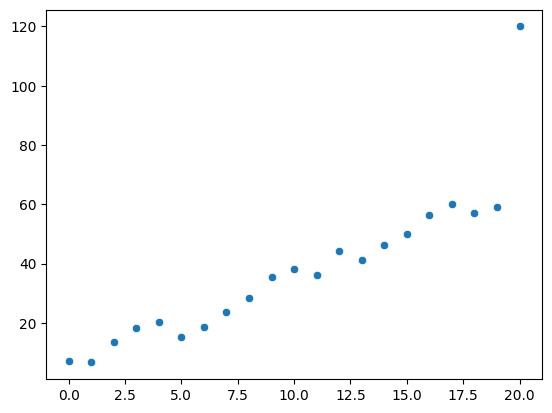

<Figure size 2000x2000 with 0 Axes>

In [44]:
y = [3*i + 10*np.random.rand() for i in range(20)]
y.append(120)
x = list(range(20))
x.append(20)

sns.scatterplot(x = x, y = y)
plt.figure(figsize=(20, 20))
plt.show()

Now, coming back to the house predictions, we can see all the statistical measures of the column using a function in Pandas called describe

In [46]:
train_df["LotFrontage"].describe()

count    1451.000000
mean       76.615782
std        24.077977
min        27.500000
25%        60.000000
50%        74.000000
75%        98.000000
max       111.500000
Name: LotFrontage, dtype: float64

Here, you can see that the mean is 70 and the median (or 50%) is 69. So both of these can be used to impute the values of the column, but when a column has outliers, it might make the mean big or small (it is not happening in this case)

To remove outliers, we just replace those values with the upper and lower whiskers.

In [47]:
# q3=train_df["LotFrontage"].quantile(0.75)
# q1=train_df["LotFrontage"].quantile(0.25)
# inter_quartile_range=q3-q1
# upper_whisker=q3+inter_quartile_range*1.5
# lower_whisker=q1-inter_quartile_range*1.5
class outlierremoval:
	def __init__(self, col):
		q1 = col.quantile(0.25)
		q3 = col.quantile(0.75)
		inter_quartile_range=q3-q1
		self.upper_whisker=q3+inter_quartile_range*1.5
		self.lower_whisker=q1-inter_quartile_range*1.5
  
	def remove(self, row):
		if(row<=self.upper_whisker and row>=self.lower_whisker):
			return row
		elif row < self.lower_whisker:
			return self.lower_whisker
		else:
			return self.upper_whisker

In [48]:
remover = outlierremoval(train_df["LotFrontage"])
train_df["LotFrontage"]=train_df["LotFrontage"].apply(remover.remove)

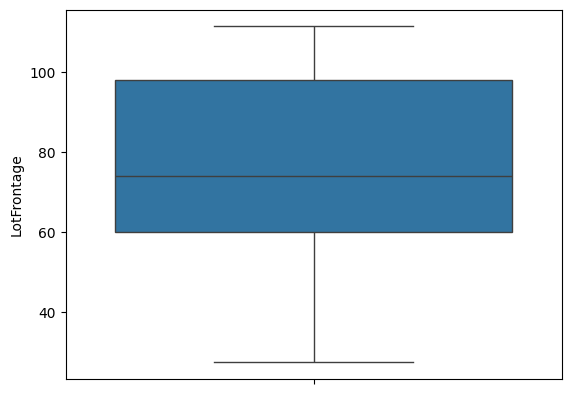

<Figure size 1000x1000 with 0 Axes>

In [49]:
sns.boxplot(train_df["LotFrontage"])
plt.figure(figsize=(10, 10))
plt.show()

Now, we have removed the outliers

In [50]:
train_df["LotFrontage"].fillna(value=train_df["LotFrontage"].mean(), inplace=True)

/tmp/ipykernel_30330/1715523588.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["LotFrontage"].fillna(value=train_df["LotFrontage"].mean(), inplace=True)


## Scaling and Standardisation

More often then not you will have different columns with different magnitudes of values, say for example the iq of a person will be around 70-140, but their rank in JEE can be from 1 to more than 800,000. Scaling and Standardisation helps us bring these values in a similar magnitude so that the training is faster and more stable.
- Scaling helps us scale all the values in a particular column between two specified values.
- Standardisation helps us bring the distribution to zero mean and unit variance

The formulae for both these are pretty easy to understand and can be found on Google.

As these both techniques scale the data, outlier removal is important before applying these techniques.

In [51]:
remover = outlierremoval(train_df['LotArea'])
train_df["LotArea"]=train_df["LotArea"].apply(remover.remove)

<Axes: ylabel='LotFrontage'>

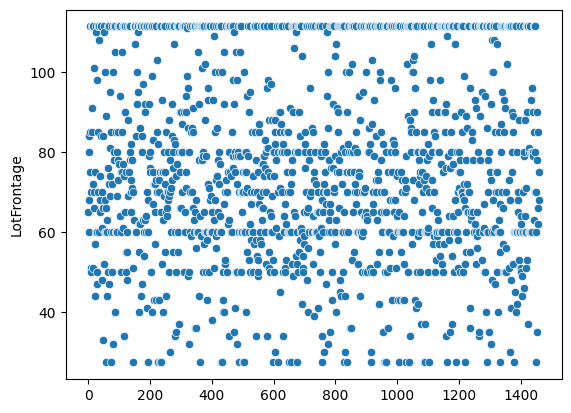

In [52]:
sns.scatterplot(train_df['LotFrontage'])

<Axes: ylabel='LotArea'>

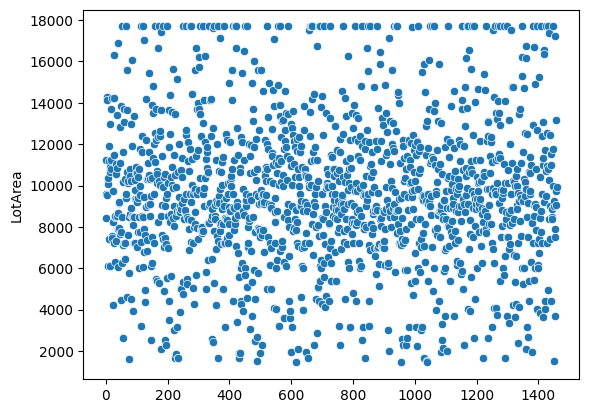

In [53]:
sns.scatterplot(train_df['LotArea'])

In [54]:
train_df["LotArea"].describe()

count     1451.000000
mean      9644.201413
std       3596.024635
min       1443.750000
25%       7537.500000
50%       9477.000000
75%      11600.000000
max      17693.750000
Name: LotArea, dtype: float64

In [55]:
train_df["LotFrontage"].describe()

count    1451.000000
mean       76.615782
std        24.077977
min        27.500000
25%        60.000000
50%        74.000000
75%        98.000000
max       111.500000
Name: LotFrontage, dtype: float64

As you can see that the magnitudes for these two columns differ by about 2. We can now apply normalisation on both these columns

In [538]:
from sklearn.preprocessing import StandardScaler

In [539]:
train_df['LotArea'] = StandardScaler().fit_transform(train_df['LotArea'].to_numpy().reshape(-1, 1).astype(np.float32))
train_df['LotFrontage'] = StandardScaler().fit_transform(train_df['LotFrontage'].to_numpy().reshape(-1, 1).astype(np.float32))

<Axes: ylabel='LotFrontage'>

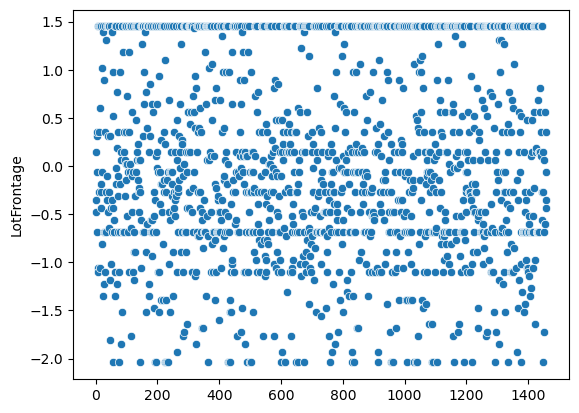

In [540]:
sns.scatterplot(train_df['LotFrontage'])

<Axes: ylabel='LotArea'>

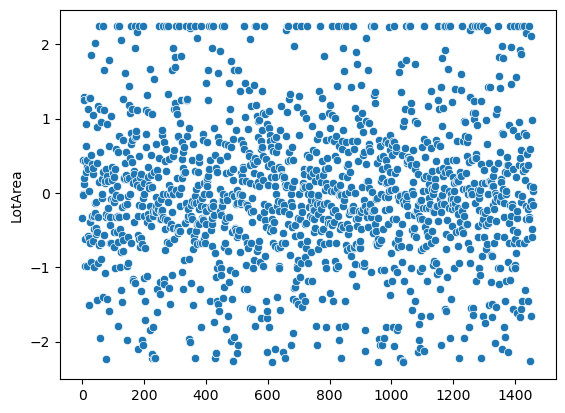

In [541]:
sns.scatterplot(train_df['LotArea'])

We can see that the distribution still remains the same, and hence the information captured by the data is the same, but the values are now of a similar magnitude and hence the model training should be much more stable. We can do this for other columns with continuous values as well, but we will skip it for now.

One last step is to one hot encode the categorical columns, especially when they have string values. This is important as the numbers given to classes might not necessarily convey the 'quantity' or 'measure' of something, for categorical columns, it might also just be used as indicator variables.

For example, in the BsmtCond column, while training, we can't assign values like TA: 1, Gd: 2, NoBasement: 3, and so on. So instead we use one hot encoding where instead of having 1 column for BsmntCond, we convert it to different columns corresponding to the different values in BsmtCond.

In [544]:
train_df["BsmtCond"].unique()

array(['TA', 'Gd', 'NoBasement', 'Fa', 'Po'], dtype=object)


This has a lot of use in Deep Learning where Layer Normalization layers are used extensively to stabilise the neural networks

## Exploratory Data Analysis

After all this preprocessing, we can now finally take a look at what the data is trying to tell us. Again, note that this is not an exhaustive list of every single technique for EDA, but it is good for starters. A lot of trial and error and eventually, skill is required to know what are the good steps for EDA and what conclusions we need to draw.

Steps like Standardisation take away the natural magnitude of the variables, so if we need to visualise data to present it, we should do so before standardisation

### For Continuous Variables

Before we start visualising, we should take a look at the statistical measures of the column, namely, mean and variance/stddev

In [550]:
train_df['LotArea'].describe()

count    1.451000e+03
mean     1.643133e-08
std      1.000345e+00
min     -2.281208e+00
25%     -5.860437e-01
50%     -4.651221e-02
75%      5.440655e-01
max      2.239229e+00
Name: LotArea, dtype: float64

As the data was scaled previously, you can see that the mean is almost zero (note the e-08) and the deviation is close to 1. But apart from these measures, we also need other measures to determine more about the data.

When looking at the outliers, we consider the 1st quartile (Q1) and 3rd quartile (Q3), which are similar to the median, but instead of occurring at the 50% mark they occur at the 25% and the 75% mark respectively. The difference between these two is called the Inter Quartile Range (IQR). Now, the <b>Upper Whisker</b> is calculated by adding the IQR to Q3 and we calculate the <b>Lower Whisker</b> subtracting IQR from Q1. We expect all our data to be between the Upper and Lower Whiskers.

In a box plot, the box is the IQR and the hands extending from the box are the Upper and Lower Whiskers

We need to check if values are concenterated on side of the mean, this can be done by calculating the skew of the distribution. Skew is a statistical measure of the third order (just like variance is of the second order).

We also need to check if some values are concentrated near the tails of the distribution. We expect to be this as the case as we collapsed the outliers on the upper and lower whiskers.

It is a good idea to start with a histogram plot for continuous variables, it gives us an idea about the distribution

<Axes: xlabel='LotArea', ylabel='Count'>

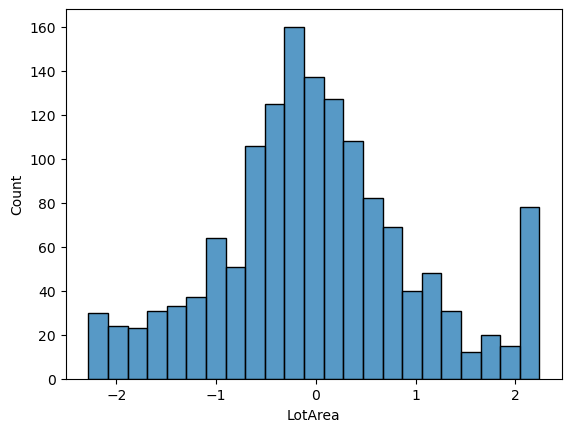

In [549]:
sns.histplot(train_df['LotArea'])

We can see that the data mostly follows a nice normal distrobution apart from the tails. We expect this as we collapsed the outliers onto the upper and lower whiskers

But the data might not always be like this. Let us take an example of skewed data.

<Axes: ylabel='Count'>

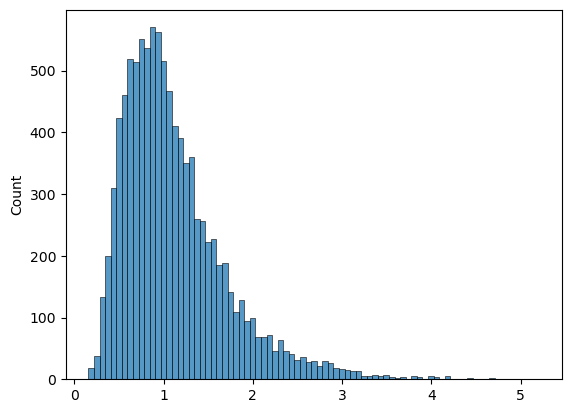

In [559]:
sns.histplot(np.exp(np.random.normal(scale=0.5, size=(10000))))

We might be able to draw some conclusions from this data. We generally expect a lot of naturally occurring variables as normal variables, because that is what experiments have shown. Most distributions we find naturally do follow a bell curve.

But when the data we have is not of that format, one of the conclusions that we can draw is that the sample chosen for the data is not good or is biased.

Usually, when skewed normal distributions are found, it is generally because of some other factors which make the data so. For example, if we consider the 'GrLivArea' column, we can see that the distribution is skewed to the left. This can happen due to the a handful hyper rich people in the dataset. Data Analysis and Visualisation can become powerful tools to draw out conclusions about the outliers.

<Axes: xlabel='GrLivArea', ylabel='Count'>

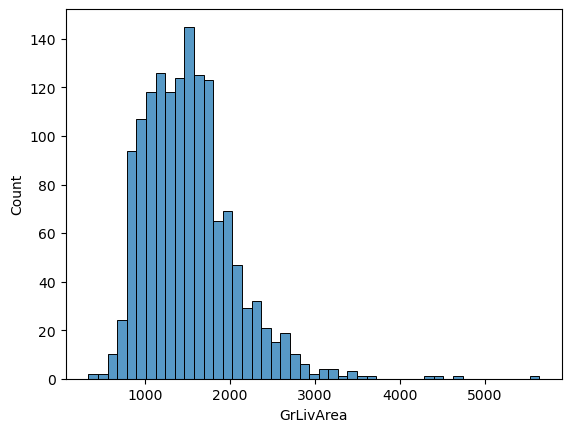

In [563]:
sns.histplot(train_df['GrLivArea'])

This also shows us that outliers are not always bad. And because of facts like these, there is a paradox between Data Cleaning and Preprocessing and EDA. We need EDA for Cleaning and Preprocessing and vice versa. But it is generally advisable to first do basic Cleaning and Preprocessing before moving to EDA.

As outliers can also be important to our data, we can't just do away with them, sometimes we do need to consider them. This dataset is a good example for the same. If we remove outliers like these, our model will output wrong predictions when given houses owned by rich people.

And due to this, EDA also plays a huge role in helping us decide what model we should use. Linear Regression based model is clearly not suitable for this as it is very sensitive to outliers. Outliers, being important in this dataset, need some other model, which is more powerful. A good choice can be decision trees, which we would learn more about towards the end on the first half of the semester.

### Categorical Columns

Categorical Columns require some different techniques for EDA. Before training, they are usually one hot encoded (there are differnt techniques to deal with them in Deep Learning, which we will look at later on) and given indicator variables.

Pandas has some handy features to look at the categorical columns, for example value_count(), groub_by(), etc

In [564]:
train_df["BsmtCond"].value_counts()

TA            1303
Gd              64
Fa              45
NoBasement      37
Po               2
Name: BsmtCond, dtype: int64

Apart from that, we have other visualising techniques for categorical columns

In [569]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

<Axes: xlabel='BsmtCond', ylabel='SalePrice'>

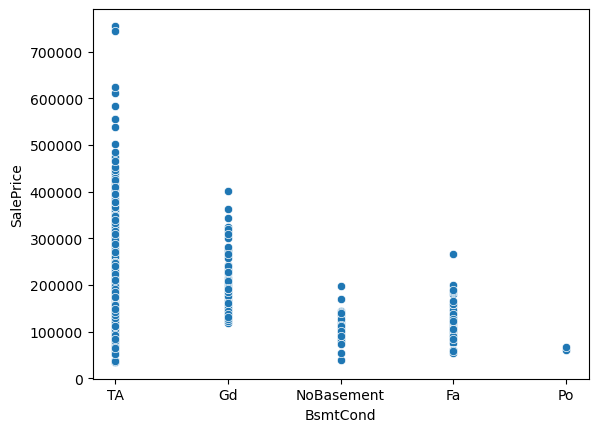

In [570]:
sns.scatterplot(x=train_df["BsmtCond"], y=train_df["SalePrice"])

Here we can look at the trends of house prices of houses with different kinds of basements. We can further improve it by using boxplots or violin plots

<Axes: xlabel='BsmtCond', ylabel='SalePrice'>

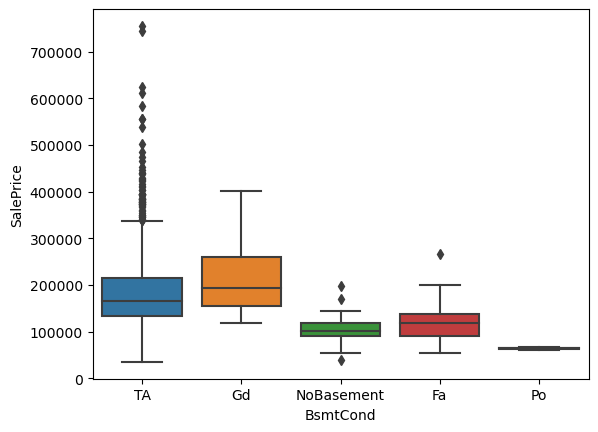

In [571]:
sns.boxplot(x=train_df["BsmtCond"], y=train_df["SalePrice"])

Violinplot is similar to boxplot, but it has an additional visualisation of the distribution of the samples

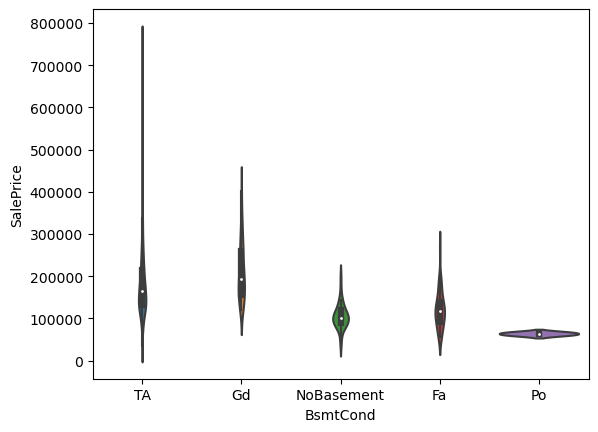

<Figure size 4000x4000 with 0 Axes>

In [575]:
sns.violinplot(x=train_df["BsmtCond"], y=train_df["SalePrice"])
plt.figure(figsize=(40,40))
plt.show()

We can also use catplots

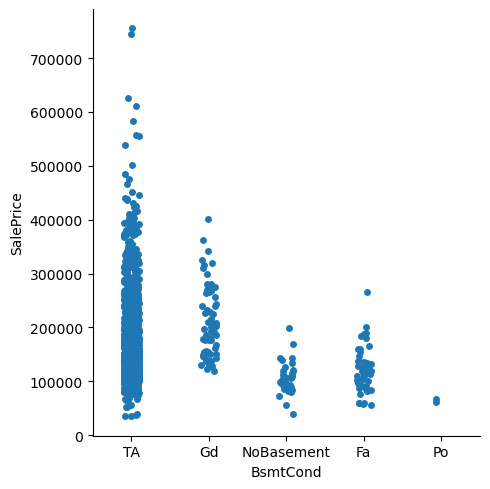

In [576]:
sns.catplot(x=train_df["BsmtCond"], y=train_df["SalePrice"])

Overall, there are a lot of techniques to look at the data and draw conclusions from it. Basic Data Visualisation can be useful to decide what models and preprocessing to use. We need to learn the math to know what to do with the data. Libraries shown today, make evereything very easy for us to do, but we need to first know what is the best path to take before we start using these techniques.

We would encourage you to explore much more as this will help you not only with ML, but also with things like making presentations for other subjects, etc.